# Demo from README

## 1. Loading data

In [1]:
from src.data_management import DataManager

# Initialize the data manager
data_manager = DataManager(data_dir='../data', datasets_index_file='datasets.csv')

# Select all datasets
data_manager.select({'collection_name': 'Demo', 'dataset_name': 'Demo1'}) 
# Get the index of the first selected dataset
dataset_index = data_manager.get(0)  
# Load the trend data (as a numpy ndarray) and the anomaly labels
trend_data, labels = data_manager.load_raw_data(dataset_index, train=False)

## 2. Detecting anomalies

In [2]:
from src.anomaly_detection import PYODAnomalyDetector, Windowing

# Initialize the anomaly detector
# Here we use an IForest with a sliding window of size 16
anomaly_detector = PYODAnomalyDetector('IForest', Windowing(window_size=100))

# Fit the anomaly detector 
anomaly_detector.fit(trend_data)
# Compute the raw anomaly scores of an observation (in range [0, infinity])
raw_anomaly_scores = anomaly_detector.decision_function(trend_data)
# Compute the probability of an observation being an anomaly (in range [0, 1])
anomaly_probabilities = anomaly_detector.predict_proba(trend_data)

## 3. Evaluating results

In [3]:
from src.evaluation import f1, pr_auc, fixed_value_threshold

# Compute the F1 score, for which discrete anomaly labels are required
predicted_anomaly_labels = fixed_value_threshold(labels, raw_anomaly_scores)
f1_score = f1(labels, predicted_anomaly_labels)

# Compute the area under the precision-recall curve
pr_auc_score = pr_auc(labels, raw_anomaly_scores)

In [4]:
print('f1:', f1_score)
print('PR-AUC:', pr_auc_score)

f1: 0.9565217391304348
PR-AUC: 0.9954144757359779


## 4. Visualizing the results

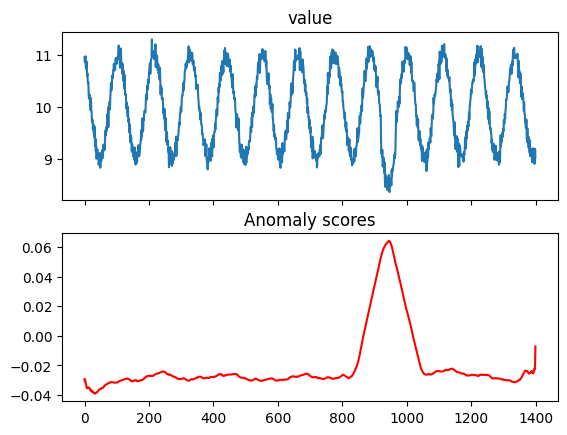

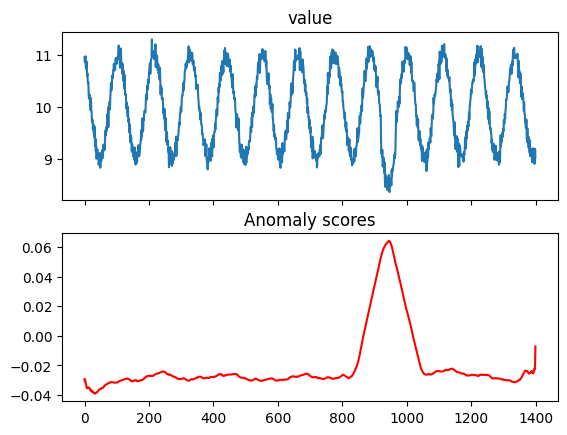

In [5]:
from src.visualization import plot_anomaly_scores

# Load the trend data as a pandas DataFrame
trend_data_df = data_manager.load(dataset_index, train=False)
plot_anomaly_scores(trend_data_df, raw_anomaly_scores)

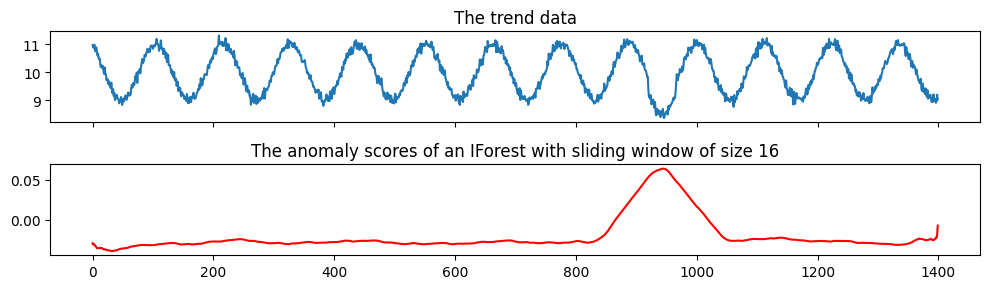

In [6]:
import matplotlib.pyplot as plt
fig = plot_anomaly_scores(trend_data_df, raw_anomaly_scores)
fig.set_size_inches(10, 3)
axs = fig.get_axes()
axs[0].set_title('The trend data')
axs[1].set_title('The anomaly scores of an IForest with sliding window of size 16')
plt.tight_layout()
plt.savefig('README_demo.svg', transparent=True)